# docs examples

### load c4dynamics 

In [1]:
import sys, os 
import numpy as np 
from matplotlib import pyplot as plt 


# sys.path.append(os.path.join(os.getcwd(), '..'))

print(os.getcwd())
# importing the c4dynamics module:

# import c4dynamics as c4d 
# from c4dynamics.eqm import eqm3
# from numpy import fft
# import numpy.fft
import c4dynamics.eqm


d:\gh_repo\c4dynamics


# eqm 3 

In [2]:
import c4dynamics as c4d 

dp = c4d.datapoint(mass = 10)
F = [0, 0, c4d.g_ms2]

c4d.eqm.eqm3(dp, F)


array([0.      , 0.      , 0.      , 0.      , 0.      , 0.980665])

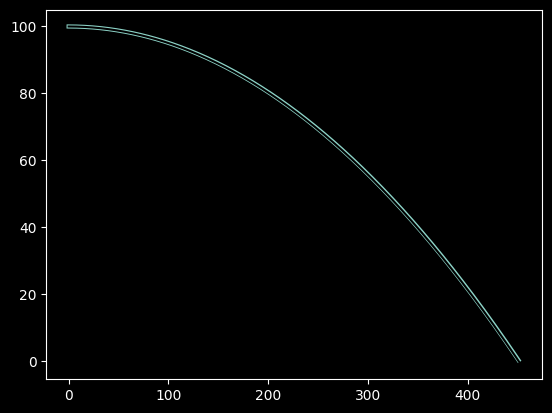

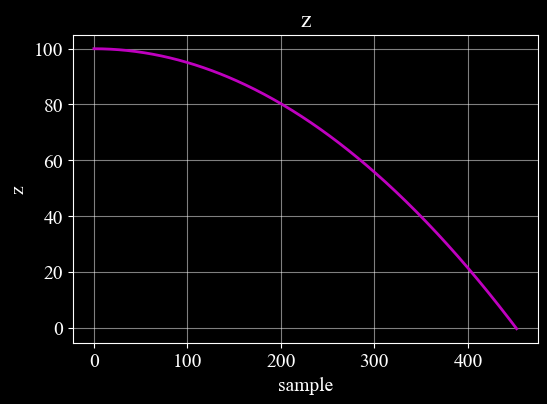

In [3]:
'''
Run the equations of motion of 
mass in a free fall:
'''

import c4dynamics as c4d

h0 = 100
dp = c4d.datapoint(z = h0)
dt = 1e-2
t = np.arange(0, 10, dt) #np.linspace(0, 10, 1000)

while True:
    if dp.z < 0: break
    dx = c4d.eqm.eqm3(dp, [0, 0, -c4d.g_ms2])
    dp.X = dp.X + dx * dt 
    dp.store()
    # print(dp.z)


# comapre to anayltic solution 
z = h0 - .5 * c4d.g_ms2 * t**2 

# z1 = dp.get_data('z')[:, np.newaxis]
# z2 = np.hstack((z[z >= 0], 0))[:, np.newaxis]
# z3 = np.concatenate((z1, z2), axis = 1)

plt.plot(z[z > 0], linewidth = 3)
plt.plot(dp.get_data('z'), 'k')

dp.draw('z')



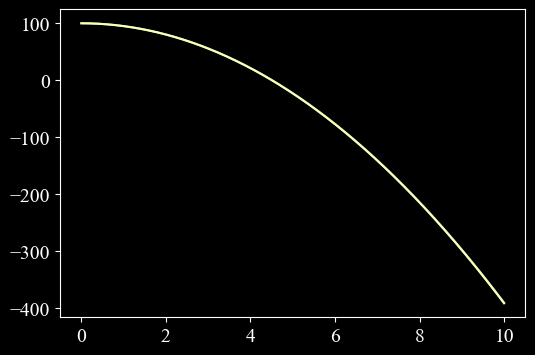

In [4]:
# test the integration 
import c4dynamics as c4d 

# analytic solution 
t = np.linspace(0, 10, 1000)
h0 = 100 # meter
v0 = 0

z = h0 + v0 * t - .5 * c4d.g_ms2 * t**2 

# integration 
pt = c4d.datapoint(z = h0)

for ti in t: 
    pt.inteqm([0, 0, -c4d.g_ms2], t[1] - t[0])
    pt.store(ti)

plt.plot(t, z)
plt.plot(pt.get_data('t'), pt.get_data('z'))



# eqm 6

In [5]:
import c4dynamics as c4d 

rb = c4d.rigidbody(iyy = 10)

F = np.zeros(3)
M = [0, -10, 0]

c4d.eqm.eqm6(rb, F, M)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.])

1.0.50


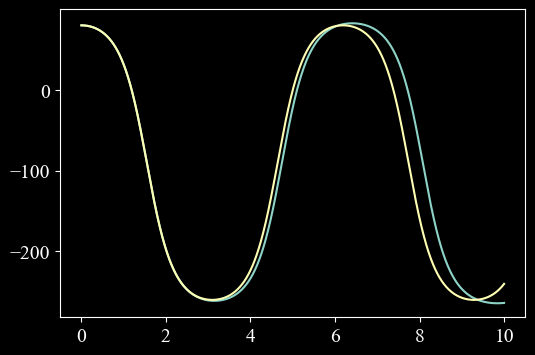

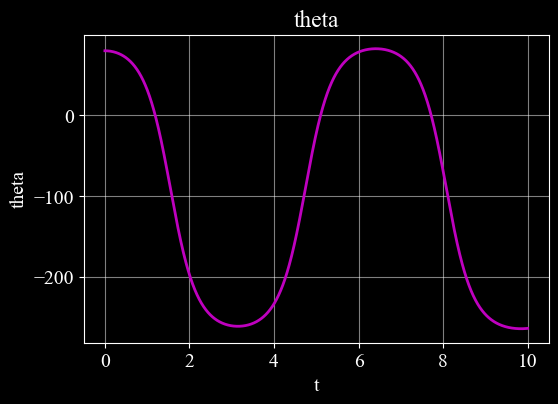

In [6]:
import c4dynamics as c4d 
print(c4d.__version__)
del rb
dt = .5e-3 

t = np.arange(0, 10, dt) # np.linspace(0, 10, 1000)
theta0 =  80 * c4d.d2r       # deg 
q0     =  0 * c4d.d2r        # deg to sec
Iyy    =  .4                  # kg * m^2 
length =  1                  # meter 
mass   =  0.5                # kg 
# theta = theta0 - Iyy / t 

# integration 
rb = c4d.rigidbody(theta = theta0, q = q0, iyy = Iyy, mass = mass)


for ti in t: 
    tau_g = -rb.mass * c4d.g_ms2 * length / 2 * c4d.cos(rb.theta)


    dx = c4d.eqm.eqm6(rb, np.zeros(3), [0, tau_g, 0])
    rb.X = rb.X + dx * dt 


    # print(rb.theta * c4d.r2d)
    # rb.inteqm(np.zeros(3), [0, tau_g, 0], dt)
    rb.store(ti)
    # print(rb.theta * c4d.r2d)

    # rb.store()
    # print(rb.z)    


fig = plt.subplots()
plt.plot(rb.get_data('t'), rb.get_data('theta') * c4d.r2d)



# analytic solution 
from scipy.integrate import odeint

def pend(y, t):
    theta, omega = y
    dydt = [omega, -rb.mass * c4d.g_ms2 * length / 2 * c4d.cos(theta) / Iyy]
    # print(dydt)
    return dydt

sol = odeint(pend, [theta0, q0], t)

# for i in range(len(t)):
#     print(str(t[i]) + '   ' + str(sol[i, 0] * c4d.r2d) + '    ' + str(rb.get_data('theta')[i] * c4d.r2d) + '   ' + str(np.abs(sol[i, 0] - rb.get_data('theta')[i]) * c4d.r2d)) 

plt.plot(t, sol[:, 0] * c4d.r2d)

# fig = plt.subplots()
# plt.plot(t, sol[:, 1] * c4d.r2d)
# plt.plot(rb.get_data('t'), rb.get_data('q') * c4d.r2d)

# rb.draw('phi')
rb.draw('theta')
# rb.draw('psi')
# rb.draw('x')
# rb.draw('y')
# rb.draw('z')
